In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Fraud Detection Using AI


In [1]:
print("Hello World")

Hello World


In [2]:
import pandas as pd
data = pd.read_csv("/kaggle/input/fraud-detection-dataset/dataset.csv")

In [3]:
data.head()

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS,Fraud Category
0,1,20,Mother,Service,"1,200,000","120,000",Quarterly,"420,000",Single,Non Medical,...,816115,ULIP,Retail Agency,NaN,30-08-2023,26-10-2023,12-12-2023,Claim,Death Claim Repudiated,Misrepresentation
1,2,33,Husband,Service,"350,000","5,000",Yearly,"180,000",Married,Non Medical,...,464001,Traditional,Retail Agency,NaN,02-03-2022,31-03-2022,10-02-2023,Claim,Death Claim Repudiated,Misrepresentation
2,3,34,Wife,Self-Employed,"350,000","5,000",Yearly,"249,000",Married,Non Medical,...,731238,Traditional,Retail Agency,NaN,08-07-2022,11-11-2022,26-06-2023,Claim,Death Claim Repudiated,Misrepresentation
3,4,34,Wife,Service,"325,000","5,000",Yearly,"360,000",Married,Non Medical,...,281504,Traditional,Retail Agency,NaN,27-12-2022,08-04-2023,14-08-2023,Claim,Death Claim Repudiated,Misrepresentation
4,5,54,Husband,Housewife,"100,000","5,000",Yearly,"600,000",Married,Non Medical,...,606001,Traditional,Retail Agency,NaN,24-03-2023,11-04-2023,06-12-2023,Claim,Death Claim Repudiated,Misrepresentation


In [4]:
len(data)

1321

In [8]:
data = pd.DataFrame(data)

In [9]:
data.head()

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS,Fraud Category
0,1,20,Mother,Service,"1,200,000","120,000",Quarterly,"420,000",Single,Non Medical,...,816115,ULIP,Retail Agency,NaN,30-08-2023,26-10-2023,12-12-2023,Claim,Death Claim Repudiated,Misrepresentation
1,2,33,Husband,Service,"350,000","5,000",Yearly,"180,000",Married,Non Medical,...,464001,Traditional,Retail Agency,NaN,02-03-2022,31-03-2022,10-02-2023,Claim,Death Claim Repudiated,Misrepresentation
2,3,34,Wife,Self-Employed,"350,000","5,000",Yearly,"249,000",Married,Non Medical,...,731238,Traditional,Retail Agency,NaN,08-07-2022,11-11-2022,26-06-2023,Claim,Death Claim Repudiated,Misrepresentation
3,4,34,Wife,Service,"325,000","5,000",Yearly,"360,000",Married,Non Medical,...,281504,Traditional,Retail Agency,NaN,27-12-2022,08-04-2023,14-08-2023,Claim,Death Claim Repudiated,Misrepresentation
4,5,54,Husband,Housewife,"100,000","5,000",Yearly,"600,000",Married,Non Medical,...,606001,Traditional,Retail Agency,NaN,24-03-2023,11-04-2023,06-12-2023,Claim,Death Claim Repudiated,Misrepresentation


In [11]:
y = data['Fraud Category']

In [12]:
y

0        Misrepresentation
1        Misrepresentation
2        Misrepresentation
3        Misrepresentation
4        Misrepresentation
               ...        
1316    Document Tampering
1317           Misselling 
1318           Misselling 
1319     Signature Forgery
1320     Signature Forgery
Name: Fraud Category, Length: 1321, dtype: object

In [14]:
x = data.drop('Fraud Category', axis=1)

In [15]:
x

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCESTATE,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS
0,1,20,Mother,Service,"1,200,000","120,000",Quarterly,"420,000",Single,Non Medical,...,Jharkhand,816115,ULIP,Retail Agency,NaN,30-08-2023,26-10-2023,12-12-2023,Claim,Death Claim Repudiated
1,2,33,Husband,Service,"350,000","5,000",Yearly,"180,000",Married,Non Medical,...,Madhya Pradesh,464001,Traditional,Retail Agency,NaN,02-03-2022,31-03-2022,10-02-2023,Claim,Death Claim Repudiated
2,3,34,Wife,Self-Employed,"350,000","5,000",Yearly,"249,000",Married,Non Medical,...,West Bengal,731238,Traditional,Retail Agency,NaN,08-07-2022,11-11-2022,26-06-2023,Claim,Death Claim Repudiated
3,4,34,Wife,Service,"325,000","5,000",Yearly,"360,000",Married,Non Medical,...,Uttar Pradesh,281504,Traditional,Retail Agency,NaN,27-12-2022,08-04-2023,14-08-2023,Claim,Death Claim Repudiated
4,5,54,Husband,Housewife,"100,000","5,000",Yearly,"600,000",Married,Non Medical,...,Tamil Nadu,606001,Traditional,Retail Agency,NaN,24-03-2023,11-04-2023,06-12-2023,Claim,Death Claim Repudiated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1317,42,Spouse,Self-Employed,"1,750,000","250,000",Yearly,"681,600",Married,Non Medical,...,Uttar Pradesh,231216,ULIP,Bancassurance,1.0,-,-,-,Cancellation,Other Reason
1317,1318,20,Son,Business,"300,000","15,000",Yearly,"200,000",Single,Non Medical,...,Madhya Pradesh,473001,Variable,Bancassurance,7.0,20-03-2013,-,-,Maturity,Disinvested Unpaid
1318,1319,54,Husband,Service,"300,000","15,000",Yearly,"1,000,000",Married,Non Medical,...,Madhya Pradesh,473001,Variable,Bancassurance,7.0,20-03-2013,-,-,Maturity,Disinvested Unpaid
1319,1320,36,Daughter,Housewife,0,"1,000,000",Single,"1,200,000",widowed,Non Medical,...,Haryana,121003,Pension,Bancassurance,1.0,19-09-2019,-,-,Inforce,-


In [18]:
x[:5]

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCESTATE,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS
0,1,20,Mother,Service,"1,200,000","120,000",Quarterly,"420,000",Single,Non Medical,...,Jharkhand,816115,ULIP,Retail Agency,NaN,30-08-2023,26-10-2023,12-12-2023,Claim,Death Claim Repudiated
1,2,33,Husband,Service,"350,000","5,000",Yearly,"180,000",Married,Non Medical,...,Madhya Pradesh,464001,Traditional,Retail Agency,NaN,02-03-2022,31-03-2022,10-02-2023,Claim,Death Claim Repudiated
2,3,34,Wife,Self-Employed,"350,000","5,000",Yearly,"249,000",Married,Non Medical,...,West Bengal,731238,Traditional,Retail Agency,NaN,08-07-2022,11-11-2022,26-06-2023,Claim,Death Claim Repudiated
3,4,34,Wife,Service,"325,000","5,000",Yearly,"360,000",Married,Non Medical,...,Uttar Pradesh,281504,Traditional,Retail Agency,NaN,27-12-2022,08-04-2023,14-08-2023,Claim,Death Claim Repudiated
4,5,54,Husband,Housewife,"100,000","5,000",Yearly,"600,000",Married,Non Medical,...,Tamil Nadu,606001,Traditional,Retail Agency,NaN,24-03-2023,11-04-2023,06-12-2023,Claim,Death Claim Repudiated


In [19]:
y[:5]

0    Misrepresentation
1    Misrepresentation
2    Misrepresentation
3    Misrepresentation
4    Misrepresentation
Name: Fraud Category, dtype: object

In [23]:
all_type_fraud = y.unique()

In [26]:
list(all_type_fraud), len(all_type_fraud)

(['Misrepresentation',
  'Document Tampering',
  'Signature Forgery',
  'Misselling ',
  'Misappropriating Funds',
  'Misappropriating funds',
  'Logging in business not sourced by oneself',
  'Impersonation',
  'Claims Fraud',
  'Kickback',
  'Agent Dual Pan Card',
  'Unauthorized activity'],
 12)

In [29]:
all_fields = x.columns

In [30]:
list(all_fields), len(all_fields)

(['Dummy Policy No',
  'ASSURED_AGE',
  'NOMINEE_RELATION',
  'OCCUPATION',
  'POLICY SUMASSURED',
  'Premium',
  'PREMIUMPAYMENTMODE',
  'Annual Income',
  'HOLDERMARITALSTATUS',
  'INDIV_REQUIREMENTFLAG',
  'Policy Term',
  'Policy Payment Term',
  'CORRESPONDENCECITY',
  'CORRESPONDENCESTATE',
  'CORRESPONDENCEPOSTCODE',
  'Product Type',
  'CHANNEL',
  'Bank code',
  'POLICYRISKCOMMENCEMENTDATE',
  'Date of Death',
  'INTIMATIONDATE',
  'STATUS',
  'SUB_STATUS'],
 23)

In [31]:
data.columns

Index(['Dummy Policy No', 'ASSURED_AGE', 'NOMINEE_RELATION', 'OCCUPATION',
       'POLICY SUMASSURED', 'Premium', 'PREMIUMPAYMENTMODE', 'Annual Income',
       'HOLDERMARITALSTATUS', 'INDIV_REQUIREMENTFLAG', 'Policy Term',
       'Policy Payment Term', 'CORRESPONDENCECITY', 'CORRESPONDENCESTATE',
       'CORRESPONDENCEPOSTCODE', 'Product Type', 'CHANNEL', 'Bank code',
       'POLICYRISKCOMMENCEMENTDATE', 'Date of Death', 'INTIMATIONDATE',
       'STATUS', 'SUB_STATUS', 'Fraud Category'],
      dtype='object')

## Converting text data in numbers

In [36]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

In [38]:
data_encoded = pd.get_dummies(data, columns=categorical_cols)

In [39]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data[categorical_cols] = ordinal_encoder.fit_transform(data[categorical_cols])

In [40]:
data

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS,Fraud Category
0,1,20,6.0,11.0,11.0,39.0,2.0,110.0,1.0,1.0,...,853.0,4.0,3.0,NaN,533.0,47.0,23.0,1.0,3.0,8.0
1,2,33,5.0,11.0,105.0,315.0,4.0,45.0,0.0,1.0,...,382.0,3.0,3.0,NaN,14.0,53.0,19.0,1.0,3.0,8.0
2,3,34,12.0,10.0,105.0,315.0,4.0,72.0,0.0,1.0,...,673.0,3.0,3.0,NaN,119.0,20.0,43.0,1.0,3.0,8.0
3,4,34,12.0,11.0,101.0,315.0,4.0,97.0,0.0,1.0,...,237.0,3.0,3.0,NaN,484.0,12.0,24.0,1.0,3.0,8.0
4,5,54,5.0,6.0,40.0,315.0,4.0,139.0,0.0,1.0,...,598.0,3.0,3.0,NaN,406.0,17.0,17.0,1.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,1317,42,11.0,10.0,29.0,155.0,4.0,152.0,0.0,1.0,...,183.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,2.0
1317,1318,20,10.0,2.0,98.0,51.0,4.0,59.0,1.0,1.0,...,392.0,5.0,0.0,7.0,319.0,0.0,0.0,4.0,7.0,9.0
1318,1319,54,5.0,11.0,98.0,51.0,4.0,0.0,0.0,1.0,...,392.0,5.0,0.0,7.0,319.0,0.0,0.0,4.0,7.0,9.0
1319,1320,36,1.0,6.0,182.0,0.0,3.0,12.0,3.0,1.0,...,21.0,2.0,0.0,1.0,310.0,0.0,0.0,2.0,1.0,10.0


In [41]:
x = data.drop('Fraud Category', axis=1)

In [42]:
y = data['Fraud Category']

In [43]:
x.head()

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCESTATE,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS
0,1,20,6.0,11.0,11.0,39.0,2.0,110.0,1.0,1.0,...,13.0,853.0,4.0,3.0,NaN,533.0,47.0,23.0,1.0,3.0
1,2,33,5.0,11.0,105.0,315.0,4.0,45.0,0.0,1.0,...,16.0,382.0,3.0,3.0,NaN,14.0,53.0,19.0,1.0,3.0
2,3,34,12.0,10.0,105.0,315.0,4.0,72.0,0.0,1.0,...,31.0,673.0,3.0,3.0,NaN,119.0,20.0,43.0,1.0,3.0
3,4,34,12.0,11.0,101.0,315.0,4.0,97.0,0.0,1.0,...,29.0,237.0,3.0,3.0,NaN,484.0,12.0,24.0,1.0,3.0
4,5,54,5.0,6.0,40.0,315.0,4.0,139.0,0.0,1.0,...,26.0,598.0,3.0,3.0,NaN,406.0,17.0,17.0,1.0,3.0


In [44]:
y.head()

0    8.0
1    8.0
2    8.0
3    8.0
4    8.0
Name: Fraud Category, dtype: float64

## Let's use XGBoost model for the prediction of the given data

In [32]:
!pip install xgboost

In [45]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


In [47]:

# Create an XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

In [48]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.92


### Grid Search for Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

grid = GridSearchCV(estimator=XGBClassifier(eval_metric='logloss'), param_grid=param_grid, scoring='accuracy', cv=3)
grid.fit(x_train, y_train)

print(f"Best Parameters: {grid.best_params_}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
16 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [52]:

# Create an XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators =100, max_depth=3, learning_rate=0.1)

# Train the model
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.94


In [54]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")


Precision: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")


Recall: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.2f}")


F1 Score: 0.92


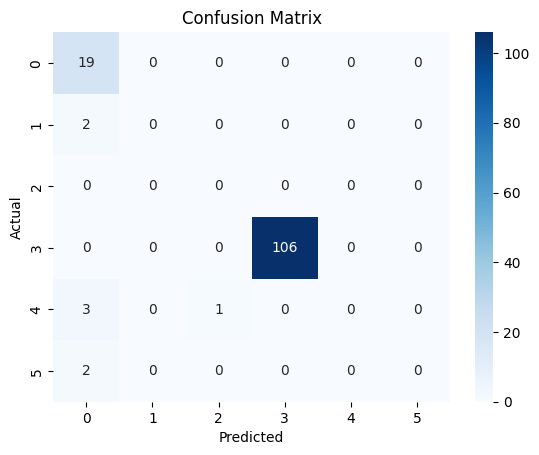

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
